## Exploratory Data Analysis

For exploratory data analysis, pre transformed and pre normalized version of the dataset was used.

In [10]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

In [11]:
# importing pre transformed dataset for exploratory analysis

dfx = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_exp.csv") 
dfx

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...
90627,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
90628,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
90629,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
90630,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


#### Descriptive Statistics

In [12]:
import scipy.stats as stats

# calculate the skewness
skewness = stats.skew(dfx.drop(['class'],axis='columns'))

skewness

array([-0.02515803,  0.19361002, -0.07601592, -0.3552825 , -0.37506259,
       -0.29879357, -0.14145027,  1.02672534])

In [13]:
# calculate the variance

variance = np.var(dfx.drop(['class'],axis='columns'))
variance

alpha       9288.716738
delta        386.528609
u              5.256885
g              4.328216
r              3.441895
i              2.949496
z              2.928245
redshift       0.150573
dtype: float64

In [14]:
# calculate the kurtosis
from scipy.stats import kurtosis

kurt = kurtosis(dfx.drop(['class'],axis='columns'))
kurt

array([-0.54199022, -1.0206499 , -0.70477816, -0.68707395, -0.70924941,
       -0.58564208, -0.42005196,  0.70520874])

In [15]:
# adding skewness, variance and kurtosis to the output of descriptive analysis

df_skewness = pd.DataFrame(skewness)
df_kurtosis = pd.DataFrame(kurt)
df_variance = pd.DataFrame(variance)

df_skewness = df_skewness.T # to transpose the dataframe
df_skewness = df_skewness.rename(index = {0:'skewness'})
df_skewness = df_skewness.rename(columns = {0:'alpha',1:'delta',2:'u',3:'g',4:'r',5:'i',6:'z',7:'redshift'})

df_kurtosis = df_kurtosis.T # to transpose the dataframe
df_kurtosis = df_kurtosis.rename(index = {0:'kurtosis'})
df_kurtosis = df_kurtosis.rename(columns = {0:'alpha',1:'delta',2:'u',3:'g',4:'r',5:'i',6:'z',7:'redshift'})

df_variance = df_variance.T # to transpose the dataframe
df_variance = df_variance.rename(index = {0:'variance'})

descriptive_stats = dfx.describe()

descriptive_stats  = pd.concat([descriptive_stats,df_skewness,df_variance,df_kurtosis])

In [16]:
descriptive_stats 

,alpha,delta,u,g,r,i,z,redshift
count,90632.000000,90632.000000,90632.000000,90632.000000,90632.000000,90632.000000,90632.000000,90632.000000
mean,177.251622,23.937649,22.122056,20.610204,19.548431,18.947715,18.617602,0.393794
std,96.378521,19.660439,2.292802,2.080448,1.855245,1.717419,1.711221,0.388040
min,0.005528,-18.785328,15.358420,14.318450,13.990440,13.862170,13.774360,-0.009971
25%,127.216162,4.897098,20.278585,18.782272,17.908307,17.514490,17.268732,0.027621
50%,180.451076,23.282869,22.282950,21.101295,19.993500,19.259190,18.860795,0.344860
75%,233.738030,39.543850,23.797190,22.194585,20.961493,20.176790,19.724610,0.602210
max,359.999810,83.000519,28.618680,26.817360,25.377300,24.387400,23.600690,1.678503
skewness,-0.025158,0.193610,-0.076016,-0.355282,-0.375063,-0.298794,-0.141450,1.026725
variance,9288.716738,386.528609,5.256885,4.328216,3.441895,2.949496,2.928245,0.150573


In [17]:
descriptive_stats.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_des_stats.csv")

#### Data Pattern Visualization

##### Visualization of distribution of astronomical objects of stars, galaxies and quasars

In [18]:
# filtering each class
stars = dfx[dfx['class'] == 'STAR']
quasars = dfx[dfx['class'] == 'QSO']
galaxies = dfx[dfx['class'] == 'GALAXY']

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


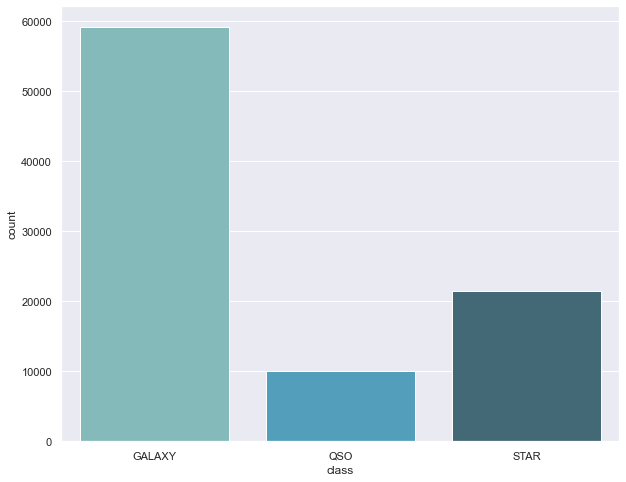

In [21]:
# visualizing distribution of each class

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfx['class'], palette='GnBu_d')
plt.show()

In [26]:
# to obtaing number of objects from each class
value_counts = dfx['class'].value_counts()

print(value_counts)

GALAXY    59132
STAR      21514
QSO        9986
Name: class, dtype: int64


##### Distribution of redshifts for each class

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

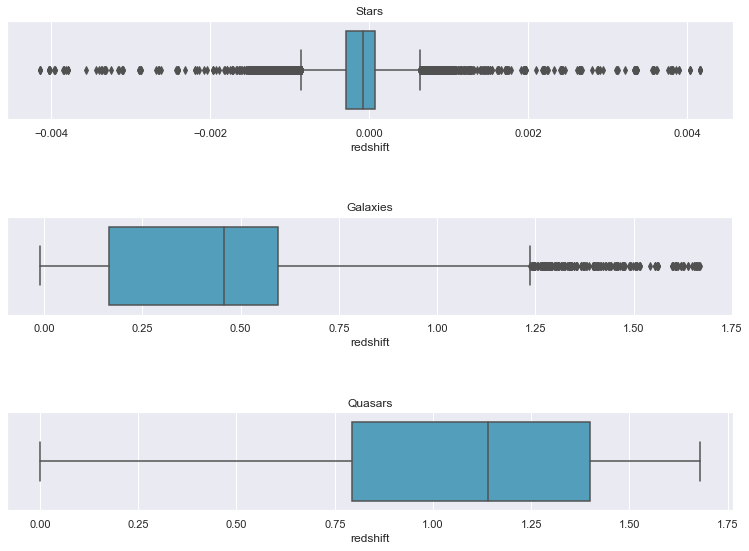

In [25]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(nrows=3)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.subplots_adjust(hspace=1)
sns.boxplot(stars['redshift'], palette='GnBu_d', ax=axs[0]).set_title('Stars')
sns.boxplot(galaxies['redshift'], palette='GnBu_d', ax=axs[1]).set_title('Galaxies')
sns.boxplot(quasars['redshift'], palette='GnBu_d', ax=axs[2]).set_title('Quasars')
plt.show()